In [187]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
from keras.models import load_model
from PIL import Image
import pandas as pd
from numpy import loadtxt
import pickle, gzip


In [197]:
model=load_model('C:\\Users\\kylop\\Desktop\\Models\\fer.h5')

In [198]:
labels = ['Angry', 'Happy', 'Neutral', 'Sad']

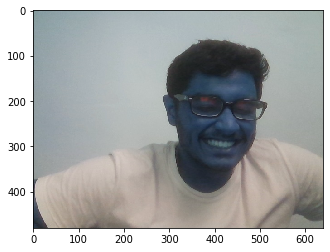

In [199]:
full_size_image = cv2.imread("opencv_1.jpg")
plt.imshow(full_size_image)

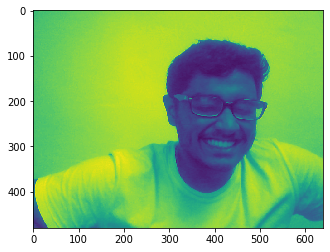

In [200]:
gray=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [201]:
#d=Image.open('opencv_2.jpg')
#d=d.resize((48,48), Image.ANTIALIAS)
#plt.imshow(d)

Emotion: Happy


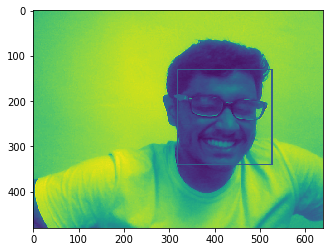

In [205]:
face_cascade = cv2.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
gray=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
d=full_size_image
for (x,y,w,h) in faces:
    cv2.rectangle(full_size_image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = full_size_image[y:y+h, x:x+w]
    d = cv2.resize(gray, (48, 48), fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    d = np.expand_dims(np.expand_dims(d, -1),0)
    yhat= model.predict(d)
    print("Emotion: "+labels[int(np.argmax(yhat))])
    plt.imshow(gray)
cv2.imshow('img',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

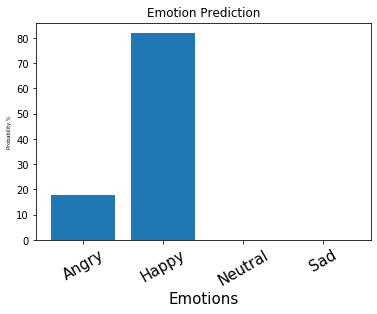

In [206]:
def plot_bar_x(n):
    # this is for plotting purpose
    index = np.arange(len(labels))
    plt.bar(labels, n)
    plt.ylabel('Probability %', fontsize=5)
    plt.xlabel('Emotions', fontsize=15)
    plt.xticks(index, labels, fontsize=15, rotation=30)
    plt.title('Emotion Prediction')
    plt.show()
plot_bar_x(np.asarray(yhat*100).reshape(-1))

In [10]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0
while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)
    if not ret:
        break
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_{}.jpg".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
cam.release()
cv2.destroyAllWindows()

d=np.asarray(d)
d=cv2.cvtColor(d,cv2.COLOR_RGB2GRAY)
plt.imshow(d)
d = np.expand_dims(np.expand_dims(d, -1),0)
yhat= model.predict(d)
print("Emotion: "+labels[int(np.argmax(yhat))])

full_size_image = cv2.imread("opencv_1.pg")
gray=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)
face = cv2.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(gray, 1.3  , 10)

for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(full_size_image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        #predicting the emotion
        yhat= model.predict(cropped_img)
        cv2.putText(full_size_image, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
        print("Emotion: "+labels[int(np.argmax(yhat))])

cv2.imshow('Emotion', full_size_image)
cv2.waitKey()

opencv_0.jpg written!
opencv_1.jpg written!
opencv_2.jpg written!
opencv_3.jpg written!
opencv_4.jpg written!
opencv_5.jpg written!
opencv_6.jpg written!
Escape hit, closing...


In [287]:
from midi2audio import FluidSynth
from IPython.display import Audio
from midiutil import MIDIFile

In [243]:
n=np.argmax(yhat)
n

1

In [209]:
import random

In [261]:
qaz=np.random.randint(1,11)
qaz=str(qaz)
qaz

'10'

In [262]:
if (n==0):
    pathn='C:\\Users\\kylop\Desktop\\angrymid'
elif (n==1):
    pathn='C:\\Users\\kylop\\Desktop\\happymid'
elif (n==3):
    pathn='C:\\Users\\kylop\\Desktop\\sadmidp'
elif (n==2):  
    pathn='C:\\Users\\kylop\\Desktop\\neutralmid'

In [289]:
mf = MIDIFile()     # only 1 track
track = 0   # the only track
time = 0   

In [276]:
with open(pathn+qaz+'.mid', "wb") as output:
    mf.writeFile(output)    
type(mf)

midiutil.MidiFile.MIDIFile

In [265]:
!pip install MIDIUtil

In [ ]:
FluidSynth("font.sf2").midi_to_audio('LSTM_music.mid', 'test.wav')
Audio("test.wav")